In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
#Data Preparation
#Download the data, read it with pandas
#Look at the data
#Make column names and values look uniform
#Check if all the columns read correctly

In [3]:
df =  pd.read_csv('../dataset/booking_train.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

#p-c => Number of previous bookings that were canceled by the customer prior to the current booking
#p-not-c => Number of previous bookings not canceled by the customer prior to the current booking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p-c                       36285 non-null  int64  
 12  p-not-c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [5]:
df.head().T
df['type_of_meal']=df['type_of_meal'].str.lower().str.replace(' ', '_')
df['room_type']=df['room_type'].str.lower().str.replace(' ', '_')
df['market_segment_type']=df['market_segment_type'].str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
booking_id,INN00001,INN00002,INN00003,INN00004,INN00005
number_of_adults,1,1,2,1,1
number_of_children,1,0,1,0,0
number_of_weekend_nights,2,1,1,0,1
number_of_week_nights,5,3,3,2,2
type_of_meal,meal_plan_1,not_selected,meal_plan_1,meal_plan_1,not_selected
car_parking_space,0,0,0,0,0
room_type,room_type_1,room_type_1,room_type_1,room_type_1,room_type_1
lead_time,224,5,1,211,48
market_segment_type,offline,online,online,online,online


In [6]:
#df['month_of_reservation'] = pd.to_datetime(df['date_of_reservation'],format='%m-%d-%Y') 
#df['month_of_reservation'].head()
#looks like date of reservation has inconsistencies in data format.

In [7]:
dates_with_slash = len(df[df["date_of_reservation"].str.contains("-")])
dates_with_hypen = len(df[~df["date_of_reservation"].str.contains("-")])
dates_with_slash,dates_with_hypen

(37, 36248)

In [8]:
#remove the data with incorrect format
df = df[~df["date_of_reservation"].str.contains("-")]

In [9]:
df['month_of_reservation'] = pd.to_datetime(df['date_of_reservation'],format='%m/%d/%Y').dt.strftime('%b') 
df['month_of_reservation'].value_counts()

month_of_reservation
Oct    5320
Sep    4612
Aug    3813
Jun    3203
Dec    3022
Nov    2981
Jul    2921
Apr    2737
May    2599
Mar    2358
Feb    1668
Jan    1014
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36248 non-null  object 
 1   number_of_adults          36248 non-null  int64  
 2   number_of_children        36248 non-null  int64  
 3   number_of_weekend_nights  36248 non-null  int64  
 4   number_of_week_nights     36248 non-null  int64  
 5   type_of_meal              36248 non-null  object 
 6   car_parking_space         36248 non-null  int64  
 7   room_type                 36248 non-null  object 
 8   lead_time                 36248 non-null  int64  
 9   market_segment_type       36248 non-null  object 
 10  repeated                  36248 non-null  int64  
 11  p-c                       36248 non-null  int64  
 12  p-not-c                   36248 non-null  int64  
 13  average_price             36248 non-null  float64
 14  special_req

In [11]:
df['booking_status'] = (df.booking_status == 'Canceled').astype(int)
#cancelled =1
#no_cancelled =0

In [12]:
df['booking_status'].value_counts()

booking_status
0    24366
1    11882
Name: count, dtype: int64

In [13]:
df['booking_status'].value_counts(normalize=True)

booking_status
0    0.672203
1    0.327797
Name: proportion, dtype: float64

In [14]:
#Perform the train/validation/test split with Scikit-Learn
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=1)
len(df),len(df_full_train),len(df_train),len(df_val),len(df_test)

(36248, 28998, 21748, 7250, 7250)

In [15]:
df_full_train  = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_full_train = df_full_train['booking_status'].values
y_train = df_train['booking_status'].values
y_val = df_val['booking_status'].values
y_test = df_test['booking_status'].values

len(y_full_train),len(y_train),len(y_val),len(y_test)


(28998, 21748, 7250, 7250)

In [17]:
del df_train['booking_status']
del df_val['booking_status']
del df_test['booking_status']

In [18]:
#EDA
df_full_train.isnull().any()
df_train.isnull().any
df_val.isnull().any()
df_test.isnull().any()

booking_id                  False
number_of_adults            False
number_of_children          False
number_of_weekend_nights    False
number_of_week_nights       False
type_of_meal                False
car_parking_space           False
room_type                   False
lead_time                   False
market_segment_type         False
repeated                    False
p-c                         False
p-not-c                     False
average_price               False
special_requests            False
date_of_reservation         False
month_of_reservation        False
dtype: bool

In [19]:
df_full_train['booking_status'].value_counts(normalize=True)

# 66% are cases there are no cancellation
# 33% are cases have cancellation


booking_status
0    0.671943
1    0.328057
Name: proportion, dtype: float64

In [20]:

global_cancellation_rate = df_full_train['booking_status'].mean()
global_cancellation_rate = round(global_cancellation_rate,2)
global_cancellation_rate

0.33

In [21]:
df_full_train.dtypes

booking_id                   object
number_of_adults              int64
number_of_children            int64
number_of_weekend_nights      int64
number_of_week_nights         int64
type_of_meal                 object
car_parking_space             int64
room_type                    object
lead_time                     int64
market_segment_type          object
repeated                      int64
p-c                           int64
p-not-c                       int64
average_price               float64
special_requests              int64
date_of_reservation          object
booking_status                int64
month_of_reservation         object
dtype: object

In [22]:
df['special_requests'].nunique()

6

In [23]:
numerical = ['number_of_adults','number_of_children','number_of_weekend_nights','number_of_week_nights','lead_time','p-c','p-not-c','average_price','special_requests']
categorical = ['type_of_meal','room_type','market_segment_type','car_parking_space','repeated','month_of_reservation']
len(categorical), len(numerical)

(6, 9)

In [24]:
for i in categorical:
    print(f'column - {i} has {df[i].nunique()} unique values')
    print(df[i].unique())

column - type_of_meal has 4 unique values
['meal_plan_1' 'not_selected' 'meal_plan_2' 'meal_plan_3']
column - room_type has 7 unique values
['room_type_1' 'room_type_4' 'room_type_2' 'room_type_6' 'room_type_5'
 'room_type_7' 'room_type_3']
column - market_segment_type has 5 unique values
['offline' 'online' 'corporate' 'aviation' 'complementary']
column - car_parking_space has 2 unique values
[0 1]
column - repeated has 2 unique values
[0 1]
column - month_of_reservation has 12 unique values
['Oct' 'Nov' 'Feb' 'May' 'Apr' 'Sep' 'Dec' 'Jul' 'Jun' 'Aug' 'Mar' 'Jan']


In [25]:
#Feature importance
#cancellation rate
#risk ratio
#mutual information


In [26]:
#cancellation rate
df_full_train['room_type'].value_counts()

room_type
room_type_1    22537
room_type_4     4800
room_type_6      768
room_type_2      542
room_type_5      216
room_type_7      128
room_type_3        7
Name: count, dtype: int64

In [27]:
room_type1_cancellation = df_full_train[df_full_train['room_type'] == 'room_type_1']['booking_status'].mean()
global_cancellation_rate - room_type1_cancellation

0.006753782668500685

In [28]:
room_type2_cancellation = df_full_train[df_full_train['room_type'] == 'room_type_2']['booking_status'].mean()
global_cancellation_rate - room_type2_cancellation

-0.0021033210332103147

In [29]:
room_type3_cancellation = df_full_train[df_full_train['room_type'] == 'room_type_3']['booking_status'].mean()
global_cancellation_rate - room_type3_cancellation

0.04428571428571432

In [30]:
#risk ratio

online_cancellation = df_full_train[df_full_train['market_segment_type'] == 'online']['booking_status'].mean()
offline_cancellation = df_full_train[df_full_train['market_segment_type'] == 'offline']['booking_status'].mean()
corp_cancellation = df_full_train[df_full_train['market_segment_type'] == 'corporate']['booking_status'].mean()
complem_cancellation = df_full_train[df_full_train['market_segment_type'] == 'complementary']['booking_status'].mean()
online_cancellation_rate = online_cancellation/global_cancellation_rate
offline_cancellation_rate = offline_cancellation/global_cancellation_rate
corp_cancellation_rate = corp_cancellation/global_cancellation_rate
complem_cancellation_rate = complem_cancellation/global_cancellation_rate
online_cancellation_rate,offline_cancellation_rate,corp_cancellation_rate,complem_cancellation_rate


(1.1030885497706944, 0.9198814120143824, 0.32831427601041546, 0.0)

In [31]:
df_group = df_full_train.groupby('room_type').booking_status.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_cancellation_rate
df_group['risk_ratio'] = df_group['mean'] / global_cancellation_rate
df_group

,mean,count,diff,risk_ratio
room_type,,,,
room_type_1,0.323246,22537,-0.006754,0.979534
room_type_2,0.332103,542,0.002103,1.006374
room_type_3,0.285714,7,-0.044286,0.865801
room_type_4,0.339583,4800,0.009583,1.029040
room_type_5,0.277778,216,-0.052222,0.841751
room_type_6,0.423177,768,0.093177,1.282355
room_type_7,0.242188,128,-0.087813,0.733902


In [32]:
from IPython.display import display

for c in categorical:
    df_group = df_full_train.groupby(c).booking_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_cancellation_rate
    df_group['risk_ratio'] = df_group['mean'] / global_cancellation_rate
    display(df_group)

,mean,count,diff,risk_ratio
type_of_meal,,,,
meal_plan_1,0.310597,22167,-0.019403,0.941203
meal_plan_2,0.469441,2667,0.139441,1.422549
meal_plan_3,0.250000,4,-0.080000,0.757576
not_selected,0.330529,4160,0.000529,1.001603


,mean,count,diff,risk_ratio
room_type,,,,
room_type_1,0.323246,22537,-0.006754,0.979534
room_type_2,0.332103,542,0.002103,1.006374
room_type_3,0.285714,7,-0.044286,0.865801
room_type_4,0.339583,4800,0.009583,1.029040
room_type_5,0.277778,216,-0.052222,0.841751
room_type_6,0.423177,768,0.093177,1.282355
room_type_7,0.242188,128,-0.087813,0.733902


,mean,count,diff,risk_ratio
market_segment_type,,,,
aviation,0.298077,104,-0.031923,0.903263
complementary,0.000000,314,-0.330000,0.000000
corporate,0.108344,1606,-0.221656,0.328314
offline,0.303561,8453,-0.026439,0.919881
online,0.364019,18521,0.034019,1.103089


,mean,count,diff,risk_ratio
car_parking_space,,,,
0,0.335196,28094,0.005196,1.015746
1,0.106195,904,-0.223805,0.321802


,mean,count,diff,risk_ratio
repeated,,,,
0,0.336141,28259,0.006141,1.018608
1,0.018945,739,-0.311055,0.057408


,mean,count,diff,risk_ratio
month_of_reservation,,,,
Apr,0.367800,2205,0.037800,1.114547
Aug,0.391547,3052,0.061547,1.186505
Dec,0.129983,2408,-0.200017,0.393889
Feb,0.258089,1329,-0.071911,0.782087
Jan,0.023691,802,-0.306309,0.071790
Jul,0.450596,2348,0.120596,1.365443
Jun,0.401491,2548,0.071491,1.216641
Mar,0.295924,1889,-0.034076,0.896739
May,0.372963,2086,0.042963,1.130190


In [33]:
#looks like market segment = online | aviation is more likely to cancel
#looks like non repeated booking is more likely to cancel
#looks like Room type 3,4,6 are more likely to cancel
#looks like meal type 2 is likely to cancel
#looks like booking in 7th (july) month is likely to have cancellation

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['booking_status'])

In [36]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

month_of_reservation    0.023450
market_segment_type     0.013879
repeated                0.008229
type_of_meal            0.004482
car_parking_space       0.004328
room_type               0.000736
dtype: float64

In [37]:
#coreelation

In [38]:
df_full_train[numerical].corrwith(df_full_train['booking_status']).abs()
#discount_offered and weiight have moderate 
#lead time seems to have moderate correlation

number_of_adults            0.088697
number_of_children          0.032400
number_of_weekend_nights    0.059945
number_of_week_nights       0.086407
lead_time                   0.443466
p-c                         0.031505
p-not-c                     0.060004
average_price               0.144550
special_requests            0.254390
dtype: float64

In [39]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
features = dv.get_feature_names_out()

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
len(dv.get_feature_names_out())


39

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

/Users/balajig/.local/share/virtualenvs/trainer-L1X3NtCU/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [42]:
model.intercept_[0]

-2.776079468841352

In [43]:
model.coef_[0].round(3)

array([ 0.02 , -1.434,  0.017,  0.395, -0.807, -0.604, -1.664,  0.219,
        0.162, -0.167, -1.498,  0.803, -2.051, -0.143,  0.066,  0.391,
       -0.129,  0.422, -0.015, -0.302,  0.119,  0.188,  0.059,  0.158,
        0.228, -0.104, -1.14 ,  0.157, -0.062, -0.026, -0.061, -0.601,
       -0.832, -1.036, -1.518, -1.008, -0.825,  0.056, -0.685])

In [44]:
#features = dv.get_feature_names_out()
features
dict(zip(features, model.coef_[0].round(3)))

{'average_price': 0.02,
 'car_parking_space': -1.434,
 'lead_time': 0.017,
 'market_segment_type=aviation': 0.395,
 'market_segment_type=complementary': -0.807,
 'market_segment_type=corporate': -0.604,
 'market_segment_type=offline': -1.664,
 'market_segment_type=online': 0.219,
 'month_of_reservation=Apr': 0.162,
 'month_of_reservation=Aug': -0.167,
 'month_of_reservation=Dec': -1.498,
 'month_of_reservation=Feb': 0.803,
 'month_of_reservation=Jan': -2.051,
 'month_of_reservation=Jul': -0.143,
 'month_of_reservation=Jun': 0.066,
 'month_of_reservation=Mar': 0.391,
 'month_of_reservation=May': -0.129,
 'month_of_reservation=Nov': 0.422,
 'month_of_reservation=Oct': -0.015,
 'month_of_reservation=Sep': -0.302,
 'number_of_adults': 0.119,
 'number_of_children': 0.188,
 'number_of_week_nights': 0.059,
 'number_of_weekend_nights': 0.158,
 'p-c': 0.228,
 'p-not-c': -0.104,
 'repeated': -1.14,
 'room_type=room_type_1': 0.157,
 'room_type=room_type_2': -0.062,
 'room_type=room_type_3': -0.02

In [45]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.41291059, 0.47172717, 0.58011297, ..., 0.00448048, 0.56704521,
       0.00527581])

In [46]:
cancelled = (y_pred >=0.5)


In [47]:
(y_val == cancelled).mean()

0.8140689655172414

In [48]:
#confusion table
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t=0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

predict_positive


array([False, False,  True, ..., False,  True, False])

In [49]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
tp, tn, fp, fn

(1509, 4393, 551, 797)

In [50]:
confusion_table = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_table

array([[4393,  551],
       [ 797, 1509]])

In [51]:
(confusion_table/confusion_table.sum()).round(2)

array([[0.61, 0.08],
       [0.11, 0.21]])

In [52]:
# Calculating accuracy using 4 values

accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8140689655172414

In [53]:
#Precision
precision = tp/(tp+fp)
precision

#27% incorrectly identified as cancelled

0.7325242718446602

In [54]:
#Recall
recall = tp/(tp+fn)
recall
#35% failed to indentify as cancelled

0.6543798785776236

In [55]:
#ROC
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)
tpr, fpr


(0.6543798785776236, 0.11144822006472492)

In [56]:
thresholds = np.linspace(0,1,101)
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    scores.append((t,tp,fp,fn,tn,precision,recall,fpr,tpr))
    
df_scores = pd.DataFrame(scores)
df_scores.columns = ['t','tp','fp','fn','tn','precision','recall','fpr','tpr']
df_scores[::10]

/var/folders/zc/tfp7r2pd6xb7fhlxrn16n6980000gn/T/ipykernel_77421/440845875.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


,t,tp,fp,fn,tn,precision,recall,fpr,tpr
0,0.0,2306,4944,0,0,0.318069,1.000000,1.000000,1.000000
10,0.1,2234,2775,72,2169,0.445997,0.968777,0.561286,0.968777
20,0.2,2054,1737,252,3207,0.541810,0.890720,0.351335,0.890720
30,0.3,1857,1152,449,3792,0.617149,0.805291,0.233010,0.805291
40,0.4,1694,838,612,4106,0.669036,0.734605,0.169498,0.734605
50,0.5,1509,551,797,4393,0.732524,0.654380,0.111448,0.654380
60,0.6,1233,329,1073,4615,0.789373,0.534692,0.066545,0.534692
70,0.7,986,197,1320,4747,0.833474,0.427580,0.039846,0.427580
80,0.8,698,82,1608,4862,0.894872,0.302689,0.016586,0.302689
90,0.9,360,15,1946,4929,0.960000,0.156114,0.003034,0.156114


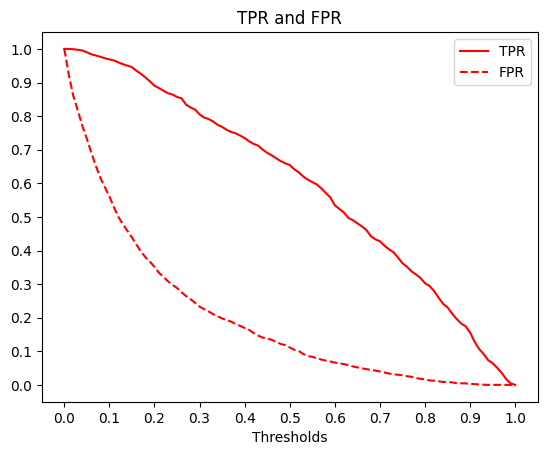

In [57]:
plt.plot(df_scores.t, df_scores.tpr, color='red', linestyle='solid', label='TPR')
plt.plot(df_scores.t, df_scores.fpr, color='red', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

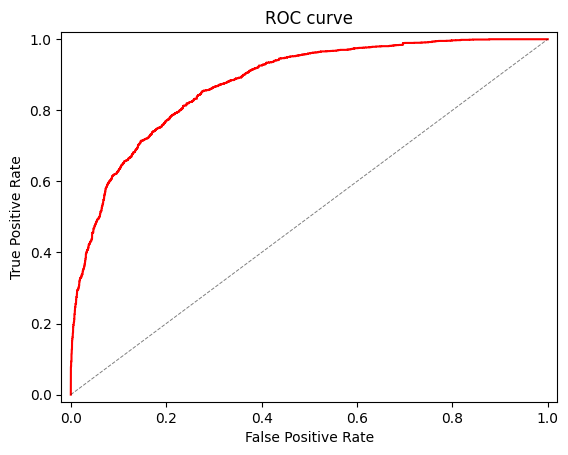

In [58]:
# now calculating using sklearn
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [59]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

auc(fpr, tpr)


0.8756607832529184

In [60]:
roc_auc_score(y_val,y_pred)

#both are same.

0.8756607832529184

In [61]:
#Kfold cross validation
def train(df, y):
    data = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(data)

    X = dv.transform(data)

    model = LogisticRegression(solver='lbfgs')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    data = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(data)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [62]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=15, shuffle=True, random_state=1)
auc_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.booking_status.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.booking_status.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    auc_scores.append(rocauc)

/Users/balajig/.local/share/virtualenvs/trainer-L1X3NtCU/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/balajig/.local/share/virtualenvs/trainer-L1X3NtCU/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

In [63]:
auc_scores

[0.8691925656902437,
 0.876935278991232,
 0.8655797101449275,
 0.8726531313864431,
 0.8685924617764264,
 0.8624047015485109,
 0.882466889017788,
 0.8591714892858348,
 0.8640161120075707,
 0.8639630136817302,
 0.8657230002057588,
 0.8598836860723065,
 0.8650470830440131,
 0.8724181686161456,
 0.873535141962605]

In [64]:
print('auc = %0.3f ± %0.3f' % (np.mean(auc_scores), np.std(auc_scores)))

auc = 0.868 ± 0.006


In [65]:
dv, model = train(df_full_train, y_full_train)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

/Users/balajig/.local/share/virtualenvs/trainer-L1X3NtCU/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8591999508089923

In [66]:
#Regularization
def train(df, y, C=1.0):
    data = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(data)

    X = dv.transform(data)

    model = LogisticRegression(solver='lbfgs', C=C, max_iter=3000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    data = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(data)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [72]:
from tqdm.auto import tqdm 
kfold = KFold(n_splits=15, shuffle=True, random_state=1)
auc_scores = []

regularization_lst = [0.001,0.01,0.1,1, 10]

for C in regularization_lst:
    auc_scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        y_train = df_train.booking_status.values

        df_val = df_full_train.iloc[val_idx]
        y_val = df_val.booking_status.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        rocauc = roc_auc_score(y_val, y_pred)
        auc_scores.append(rocauc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(auc_scores), np.std(auc_scores))) 

0it [00:00, ?it/s]

C=0.001, auc = 0.855 ± 0.007


0it [00:00, ?it/s]

C=0.01, auc = 0.871 ± 0.005


0it [00:00, ?it/s]

C=0.1, auc = 0.873 ± 0.005


0it [00:00, ?it/s]

C=1, auc = 0.873 ± 0.005


0it [00:00, ?it/s]

C=10, auc = 0.873 ± 0.005


In [75]:
#C=1 looks fine.

dv, model = train(df_full_train, y_full_train, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8626994482183783

In [76]:
model

LogisticRegression(max_iter=3000)

In [77]:
#save the model
import pickle

with open('../model/cancellation-pred-model-lr.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [ ]:
#auc score - 0.86